# Karateclub algorithms

In [12]:
from karateclub import EgoNetSplitter
from karateclub import LabelPropagation
from karateclub import DANMF
from karateclub import GEMSEC
import networkx as nx
import matplotlib.pyplot as plt
import pickle

import numpy as np

G = nx.read_edgelist("./pruned_connected_youtube/release-youtube-links.txt")

In [15]:
file_indexes = [index for index in range(G.number_of_nodes())]
graph_indexes = [i for i in range(len(file_indexes))]
file_index_to_graph_index = dict()
graph_index_to_file_index = dict()
for i in range(len(file_indexes)):
    file_index_to_graph_index[file_indexes[i]] = graph_indexes[i]
    graph_index_to_file_index[graph_indexes[i]] = file_indexes[i]
G = nx.convert_node_labels_to_integers(G)

# Ego-splitting

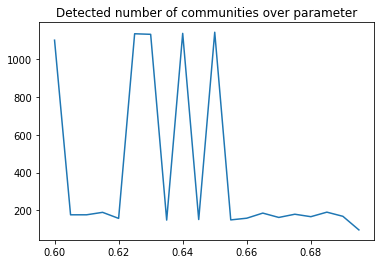

In [29]:
to_test_vals = [(0.6 + 0.005*i) for i in range(0, 20)]
com_detected = []
for value in to_test_vals:
    splitter = EgoNetSplitter(value)
    splitter.fit(G)
    cluster_membership = splitter.get_memberships()
    comms = list(cluster_membership.values())
    for i in range(len(comms)):
        comms[i] = comms[i][0]
    com_detected.append(np.amax(comms) - 1)
plt.plot(to_test_vals, com_detected)
plt.title("Detected number of communities over parameter")
plt.show()

In [50]:
splitter = EgoNetSplitter(0.605)
splitter.fit(G)
cluster_membership = splitter.get_memberships()
comms = list(cluster_membership.values())
for i in range(len(comms)):
    cluster_membership[i] = comms[i][0]
print(f"Detected {np.amax(comms) - 1} communities.")

Detected 177 communities.


In [51]:
with open('EgoSplittingPredictions_0.605.pkl', 'wb') as f:
    pickle.dump(cluster_membership, f)

# Label propagation

In [38]:
model = LabelPropagation()
model.fit(G)
cluster_membership = model.get_memberships()
comms = list(cluster_membership.values())
print(f"Detected {len(set(comms))} communities.")

Detected 437 communities.


In [39]:
with open('LabelPropagationPredictions.pkl', 'wb') as f:
    pickle.dump(cluster_membership, f)

# DANMF

In [40]:
model = DANMF()
# OOM
model.fit(G)
cluster_membership = model.get_memberships()
comms = list(cluster_membership.values())
print(f"Detected {len(set(comms))} communities.")

/home/geraud/Machine-Learning-in-Network-Science/.venv/lib/python3.8/site-packages/karateclub/community_detection/overlapping/danmf.py:48: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self._A = nx.adjacency_matrix(
<class 'networkx.utils.decorators.argmap'> compilation 17:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/geraud/Machine-Learning-in-Network-Science/.venv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(
/home/geraud/Machine-Learning-in-Network-Science/.venv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


Detected 8 communities.


In [41]:
with open('DANMFPredictions.pkl', 'wb') as f:
    pickle.dump(cluster_membership, f)

# GEMSEC

In [13]:
clusters = [10, 50, 100, 300]
for cluster in clusters:
    model = GEMSEC(clusters=cluster)
    model.fit(G)
    cluster_membership = model.get_memberships()
    comms = list(cluster_membership.values())
    print(f"Detected {len(set(comms))} communities.")
    with open(f'GEMSECPredictions_{cluster}.pkl', 'wb') as f:
        pickle.dump(cluster_membership, f) 

Detected 10 communities.
Detected 50 communities.
Detected 100 communities.
Detected 299 communities.


In [43]:
with open('GEMSECPredictions.pkl', 'wb') as f:
    pickle.dump(cluster_membership, f)

# Extended modularity on predictions

In [49]:
with open('EgoSplittingPredictions_0.605.pkl', 'rb') as f:
    ego_split_cluster_membership = pickle.load(f)
with open('LabelPropagationPredictions.pkl', 'rb') as f:
    label_prop_cluster_membership = pickle.load(f)
with open('DANMFPredictions.pkl', 'rb') as f:
    danmf_cluster_membership = pickle.load(f)

In [17]:
# from extended_modularity import EQ_Newman

# with open("./pruned_connected_youtube/release-youtube.cmty.txt") as f:
#     ground_truth = f.readlines()
# for i in range(len(ground_truth)):
#     ground_truth[i] = ground_truth[i].split()
#     for j in range(len(ground_truth[i])):
#         ground_truth[i][j] = file_index_to_graph_index[int(ground_truth[i][j])]
# # print(ground_truth)
# mod = EQ_Newman(G, ground_truth)

# print('modularity: {:.4f}'.format(mod))

modularity: nan


In [51]:
with open('LabelPropagationPredictions.pkl', 'rb') as f:
    cluster_membership = pickle.load(f)
n_communities = len(set(cluster_membership.values()))
communities = [[] for i in range(n_communities)]
previous_indexes = list(set(cluster_membership.values()))
new_index = [i for i in range(n_communities)]
conversion_dict = dict()
for i in range(len(previous_indexes)):
    conversion_dict[previous_indexes[i]] = new_index[i]
for key in cluster_membership:
    communities[conversion_dict[cluster_membership[key]]].append(int(key))
# print(len(communities))
mod = EQ_Newman(G, communities)

print('modularity: {:.4f}'.format(mod))

modularity: 0.3035


In [5]:
with open('EgoSplittingPredictions_0.605.pkl', 'rb') as f:
    cluster_membership = pickle.load(f)
n_communities = len(set(cluster_membership.values()))
communities = [[] for i in range(n_communities)]
previous_indexes = list(set(cluster_membership.values()))
new_index = [i for i in range(n_communities)]
conversion_dict = dict()
for i in range(len(previous_indexes)):
    conversion_dict[previous_indexes[i]] = new_index[i]
for key in cluster_membership:
    communities[conversion_dict[cluster_membership[key]]].append(int(key))
# print(len(communities))
mod = EQ_Newman(G, communities)

print('modularity: {:.4f}'.format(mod))

modularity: 0.0559


In [6]:
clusters = [10, 50, 100, 300]
for cluster in clusters:
    with open(f'GEMSECPredictions_{cluster}.pkl', 'rb') as f:
        cluster_membership = pickle.load(f)
    n_communities = len(set(cluster_membership.values()))
    communities = [[] for i in range(n_communities)]
    previous_indexes = list(set(cluster_membership.values()))
    new_index = [i for i in range(n_communities)]
    conversion_dict = dict()
    for i in range(len(previous_indexes)):
        conversion_dict[previous_indexes[i]] = new_index[i]
    for key in cluster_membership:
        communities[conversion_dict[cluster_membership[key]]].append(int(key))
    # print(len(communities))
    mod = EQ_Newman(G, communities)

    print('GEMSEC ({cluster} clusters) modularity: {:.4f}'.format(mod))

modularity: 0.2072


In [7]:
with open('LabelPropagationPredictions.pkl', 'rb') as f:
    cluster_membership = pickle.load(f)
n_communities = len(set(cluster_membership.values()))
communities = [[] for i in range(n_communities)]
previous_indexes = list(set(cluster_membership.values()))
new_index = [i for i in range(n_communities)]
conversion_dict = dict()
for i in range(len(previous_indexes)):
    conversion_dict[previous_indexes[i]] = new_index[i]
for key in cluster_membership:
    communities[conversion_dict[cluster_membership[key]]].append(int(key))
# print(len(communities))
mod = EQ_Newman(G, communities)

print('modularity: {:.4f}'.format(mod))

modularity: 0.1306


# Computing overlapping normalized mutual information

In [18]:
with open("./pruned_connected_youtube/release-youtube.cmty.txt") as f:
    ground_truth = f.readlines()
for i in range(len(ground_truth)):
    ground_truth[i] = ground_truth[i].split()
    for j in range(len(ground_truth[i])):
        # ground_truth[i][j] = int(ground_truth[i][j])
        ground_truth[i][j] = file_index_to_graph_index[int(ground_truth[i][j])]
    ground_truth[i] = set(ground_truth[i])

In [19]:
from cdlib.evaluation.internal import onmi

clusters = [10, 50, 100, 300]

print("############### GEMSEC results ###############")
for cluster in clusters:
    with open(f'GEMSECPredictions_{cluster}.pkl', 'rb') as f:
        cluster_membership = pickle.load(f)
    n_communities = len(set(cluster_membership.values()))
    communities = [[] for i in range(n_communities)]
    previous_indexes = list(set(cluster_membership.values()))
    new_index = [i for i in range(n_communities)]
    conversion_dict = dict()
    for i in range(len(previous_indexes)):
        conversion_dict[previous_indexes[i]] = new_index[i]
    for key in cluster_membership:
        communities[conversion_dict[cluster_membership[key]]].append(int(key))
    for i in range(len(communities)):
        communities[i] = set(communities[i])
    score=onmi.onmi(
        ground_truth,
        communities,
    )
    print(f"Cluster:{cluster}\t\tONMI score: {score}")

############### GEMSEC results ###############
Cluster:10		ONMI score: 0.0017857365773017442
Cluster:50		ONMI score: 0.002017350695510567
Cluster:100		ONMI score: 0.0
Cluster:300		ONMI score: 0.0


In [20]:
print("############### Ego-Splitting results ###############")
with open(f'EgoSplittingPredictions_0.605.pkl', 'rb') as f:
    cluster_membership = pickle.load(f)
n_communities = len(set(cluster_membership.values()))
communities = [[] for i in range(n_communities)]
previous_indexes = list(set(cluster_membership.values()))
new_index = [i for i in range(n_communities)]
conversion_dict = dict()
for i in range(len(previous_indexes)):
    conversion_dict[previous_indexes[i]] = new_index[i]
for key in cluster_membership:
    communities[conversion_dict[cluster_membership[key]]].append(int(key))
for i in range(len(communities)):
    communities[i] = set(communities[i])
score=onmi.onmi(
    ground_truth,
    communities,
)
print(f"Community detected: {n_communities}\t\tONMI score: {score}")

############### Ego-Splitting results ###############
Community detected: 179		ONMI score: 0.0


In [21]:
print("############### Label propagation results ###############")
with open(f'LabelPropagationPredictions.pkl', 'rb') as f:
    cluster_membership = pickle.load(f)
n_communities = len(set(cluster_membership.values()))
communities = [[] for i in range(n_communities)]
previous_indexes = list(set(cluster_membership.values()))
new_index = [i for i in range(n_communities)]
conversion_dict = dict()
for i in range(len(previous_indexes)):
    conversion_dict[previous_indexes[i]] = new_index[i]
for key in cluster_membership:
    communities[conversion_dict[cluster_membership[key]]].append(int(key))
for i in range(len(communities)):
    communities[i] = set(communities[i])
score=onmi.onmi(
    ground_truth,
    communities,
)
print(f"Community detected: {n_communities}\t\tONMI score: {score}")

############### Label propagation results ###############
Community detected: 437		ONMI score: 0.0027962479275120966


In [22]:
print("############### DANMF results ###############")
with open(f'DANMFPredictions.pkl', 'rb') as f:
    cluster_membership = pickle.load(f)
n_communities = len(set(cluster_membership.values()))
communities = [[] for i in range(n_communities)]
previous_indexes = list(set(cluster_membership.values()))
new_index = [i for i in range(n_communities)]
conversion_dict = dict()
for i in range(len(previous_indexes)):
    conversion_dict[previous_indexes[i]] = i
for key in cluster_membership:
    communities[conversion_dict[cluster_membership[key]]].append(key)
for i in range(len(communities)):
    communities[i] = set(communities[i])
score=onmi.onmi(
    ground_truth,
    communities,
)
print(f"Community detected: {n_communities}\t\tONMI score: {score}")

############### DANMF results ###############
Community detected: 8		ONMI score: 0.0
